**Course website**: https://github.com/leomiquelutti/UFU-geofisica-1

**Note**: This notebook is part of the course "Geofísica 1" of Geology program of the 
[Universidade Federal de Uberlândia](http://www.ufu.br/). 
All content can be freely used and adapted under the terms of the 
[Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)

Agradecimentos especiais ao [Leonardo Uieda](www.leouieda.com)

Esse documento que você está usando é um [Jupyter notebook](http://jupyter.org/). É um documento interativo que mistura texto (como esse), código (como abaixo), e o resultado de executar o código (números, texto, figuras, videos, etc).

# Magnetometria - modelando a anomalia magnética de campo total gerada por esferas

## Objetivos

* Visualizar a anomalia magnética gerada por esferas.
* Verificar como os valores da anomalia variam com a dimensão do corpo.
* Verificar como os valores da anomalia variam com a profundidade do corpo.
* Verificar como os valores da anomalia variam com a magnetização do corpo, lembrando que esta é uma grandeza vetorial.

## Instruções

O notebook te fornecerá exemplos interativos que trabalham os temas abordados no questionário. Utilize esses exemplos para responder as perguntas.

As células com números ao lado, como `In [1]:`, são código [Python](http://python.org/). Algumas dessas células não produzem resultado e servem de preparação para os exemplos interativos. Outras, produzem gráficos interativos. **Você deve executar todas as células, uma de cada vez**, mesmo as que não produzem gráficos.

Para executar uma célula, clique em cima dela e aperte `Shift + Enter`. O foco (contorno verde ou cinza em torno da célula) deverá passar para a célula abaixo. Para rodá-la, aperte `Shift + Enter` novamente e assim por diante. Você pode executar células de texto que não acontecerá nada.

In [5]:
from fatiando import mesher, gridder, utils
from fatiando.gravmag import sphere
from fatiando.vis import mpl

### Inclinação e declinação
A célula abaixo contém valores de inclinação e declinação definidos pelo usuário. **Altere-os e execute novamente o programa para observar como o resultado se comporta**.

In [9]:
# Set the inclination and declination of the regional field
inc = -30
dec = 15

### Modelo
A célula abaixo contém o modelo (esferas) definidos pelo usuário. 

**Altere-os e execute novamente o programa para observar como o resultado se comporta**. 

Tente adicionar esferas com parâmetros diferentes, lembrando que 
`mesher.Sphere(x, y, z, r, {'magnetization': utils.ang2vec(intensity, inclination, declination)})`

In [6]:
# Create a sphere model
model = [
    # One with induced magnetization
    mesher.Sphere(0, 2000, 600, 500,
                  {'magnetization': utils.ang2vec(5, inc, dec)}),
    # and one with remanent
    mesher.Sphere(0, -2000, 600, 500,
                  {'magnetization': utils.ang2vec(10, 70, -50)})]

A célula abaixo define um grid e calcula a anomalia de acordo com os parâmetros do usuário.

In [7]:
# Create a regular grid at 100m height
shape = (100, 100)
area = (-5000, 5000, -5000, 5000)
xp, yp, zp = gridder.regular(area, shape, z=-100)
# Calculate the anomaly for a given regional field
tf = sphere.tf(xp, yp, zp, model, inc, dec)

A célula abaixo cria a imagem da _anomalia de campo total_.

C:\Users\leomi\Anaconda2\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'picker'
  s)


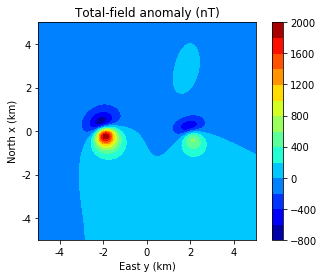

In [8]:
# Plot
mpl.figure()
mpl.title("Total-field anomaly (nT)")
mpl.axis('scaled')
mpl.contourf(yp, xp, tf, shape, 15)
mpl.colorbar()
mpl.xlabel('East y (km)')
mpl.ylabel('North x (km)')
mpl.m2km()
mpl.show()